In [ ]:
#Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/projet ets/corelation final/encoded/encoded_noString_noNan.csv')
target_column_name = 'tr_duration'
if target_column_name not in df.columns:
    raise ValueError(f"Target column {target_column_name} does not exist in the DataFrame.")

X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 0.00095531576022735
Root Mean Squared Error (RMSE): 0.030908182738998907
Mean Absolute Error (MAE): 0.022312482692300687
R^2 Score: 0.4565558358762627


In [ ]:
#Decision Trees

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd


param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

dt_model = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

y_pred_dt = grid_search.best_estimator_.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor Metrics:")
print(f"MSE: {mse_dt}")
print(f"MAE: {mae_dt}")
print(f"R-squared: {r2_dt}")



Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Regressor Metrics:
MSE: 0.00018989973509875253
MAE: 0.006981002915906813
R-squared: 0.8919729924862742


In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

param_grid = {
    'n_estimators': [100,500],
    'max_depth': [5,40],
}

rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid,
                              cv=3,
                              n_jobs=-1,
                              verbose=1)

rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Best Random Forest Regressor Metrics:")
print(f"MSE: {mse_rf}")
print(f"MAE: {mae_rf}")
print(f"R-squared: {r2_rf}")

print("Best parameters found: ", rf_grid_search.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Random Forest Regressor Metrics:
MSE: 0.00011329249521607633
MAE: 0.005486292168261337
R-squared: 0.9355520468441336
Best parameters found:  {'max_depth': 40, 'n_estimators': 100}


In [ ]:
#K-Nearest Neighbors (KNN):

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'leaf_size':[30,100,150],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors': [3, 5,],
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance'],
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

y_pred_knn = best_knn_model.predict(X_test_scaled)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Optimized K-Nearest Neighbors (KNN) Metrics:")
print(f"MSE: {mse_knn}")
print(f"MAE: {mae_knn}")
print(f"R-squared: {r2_knn}")


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Optimized K-Nearest Neighbors (KNN) Metrics:
MSE: 0.0002455439182286274
MAE: 0.007996531730005496
R-squared: 0.8603190537067376


In [ ]:
#Neural Networks (using TensorFlow/Keras):

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1)
])

nn_model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)

history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=0
)

best_nn_model = keras.models.load_model('best_model.h5')

y_pred_nn = best_nn_model.predict(X_test_scaled)

mse_nn = mean_squared_error(y_test, y_pred_nn.flatten())
mae_nn = mean_absolute_error(y_test, y_pred_nn.flatten())
r2_nn = r2_score(y_test, y_pred_nn.flatten())

print("Neural Network Metrics:")
print(f"MSE: {mse_nn}")
print(f"MAE: {mae_nn}")
print(f"R-squared: {r2_nn}")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


49/49 [==============================] - 0s 2ms/step
Neural Network Metrics:
MSE: 0.0002670450457555713
MAE: 0.010816215421294835
R-squared: 0.848087849362514


In [ ]:
!pip install tpot


In [ ]:
#XGBoost:

Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 500}
XGBoost Regressor Metrics (Best Model):
MSE: 0.0001324448843969129
MAE: 0.0061232105571818575
R-squared: 0.924656953763208


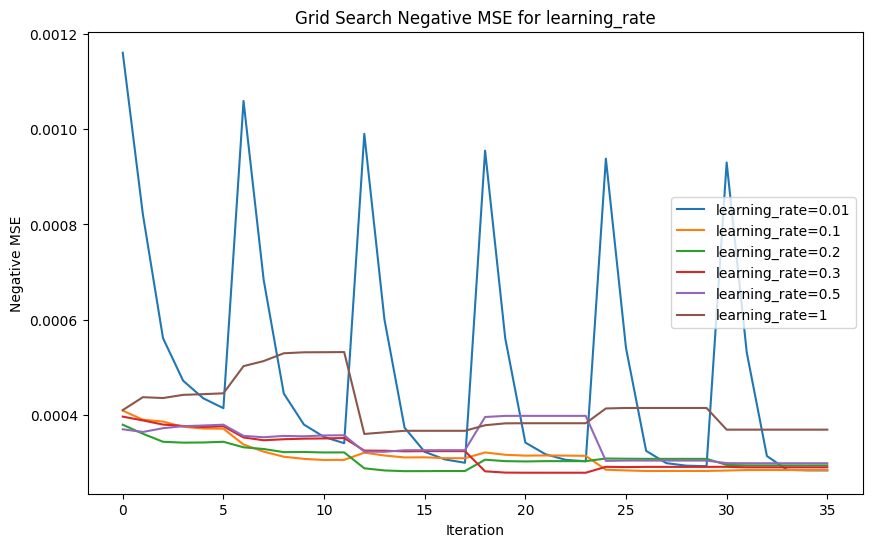

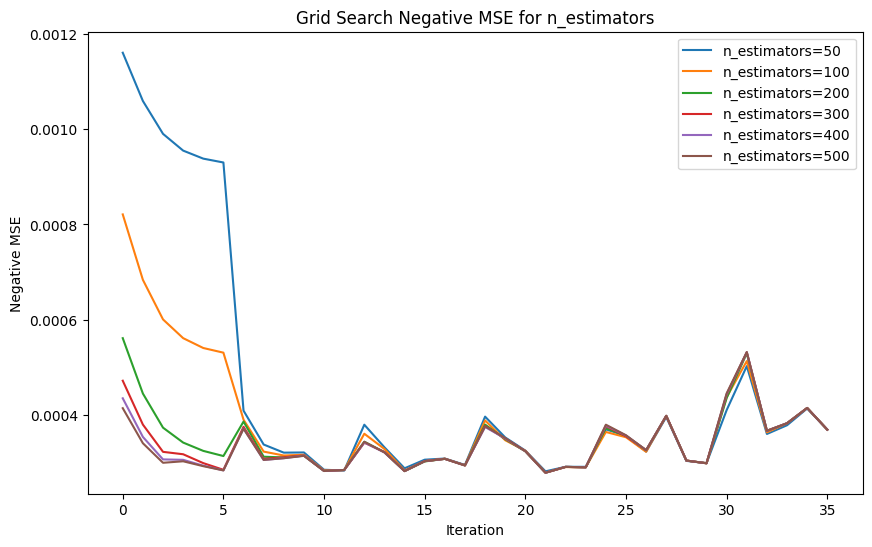

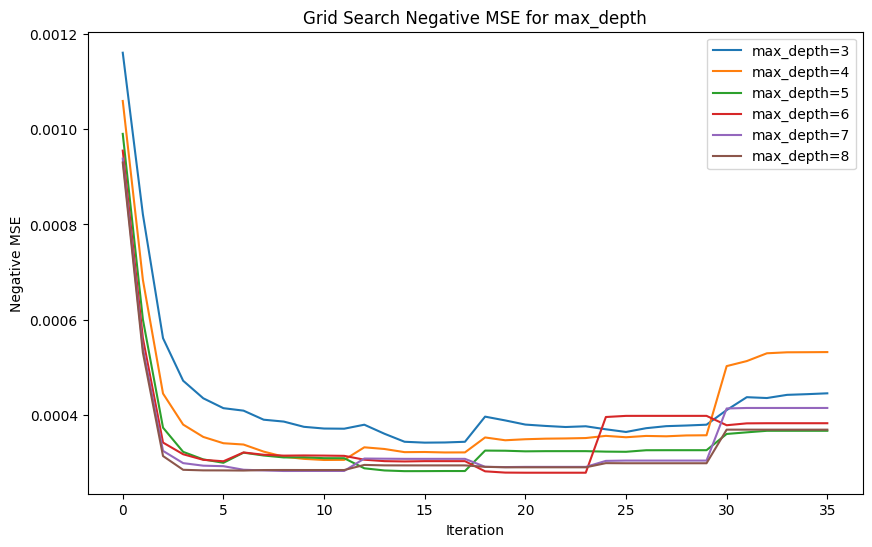

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5,1],
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8]
}

xgb_model = xgb.XGBRegressor()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_xgb_best = best_model.predict(X_test)

mse_xgb_best = mean_squared_error(y_test, y_pred_xgb_best)
mae_xgb_best = mean_absolute_error(y_test, y_pred_xgb_best)
r2_xgb_best = r2_score(y_test, y_pred_xgb_best)

print(f'Best Hyperparameters: {best_params}')
print("XGBoost Regressor Metrics (Best Model):")
print(f"MSE: {mse_xgb_best}")
print(f"MAE: {mae_xgb_best}")
print(f"R-squared: {r2_xgb_best}")

results = grid_search.cv_results_
param_names = list(param_grid.keys())
param_values = [param_grid[name] for name in param_names]

for i, param_name in enumerate(param_names):
    plt.figure(figsize=(10, 6))
    for j, param_value in enumerate(param_values[i]):
        param_mask = results['param_' + param_name] == param_value
        mean_test_score = -results['mean_test_score'][param_mask]
        plt.plot(mean_test_score, label=f'{param_name}={param_value}')
    plt.xlabel('Iteration')
    plt.ylabel('Negative MSE')
    plt.title(f'Grid Search Negative MSE for {param_name}')
    plt.legend()
    plt.show()


In [ ]:
#Classification problem

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

data = pd.read_csv('/content/drive/MyDrive/projet ets/corelation final/encoded/encoded_noString_noNan.csv')

tr_duration_data = data['tr_duration'].values.reshape(-1, 1)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tr_duration_data)
    inertia.append(kmeans.inertia_)

optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(tr_duration_data)

thresholds = np.sort(kmeans.cluster_centers_.flatten())

print("Automatically determined thresholds:", thresholds)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Automatically determined thresholds: [0.00917768 0.06262462 0.1275046 ]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

kmeans.fit(tr_duration_data)
plt.figure(figsize=(10, 6))
plt.scatter(tr_duration_data, np.zeros_like(tr_duration_data), c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_, np.zeros_like(kmeans.cluster_centers_), color='black', marker='x', s=100)
plt.title('Cluster Centers in tr_duration Data')
plt.xlabel('tr_duration')
plt.yticks([])
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logist

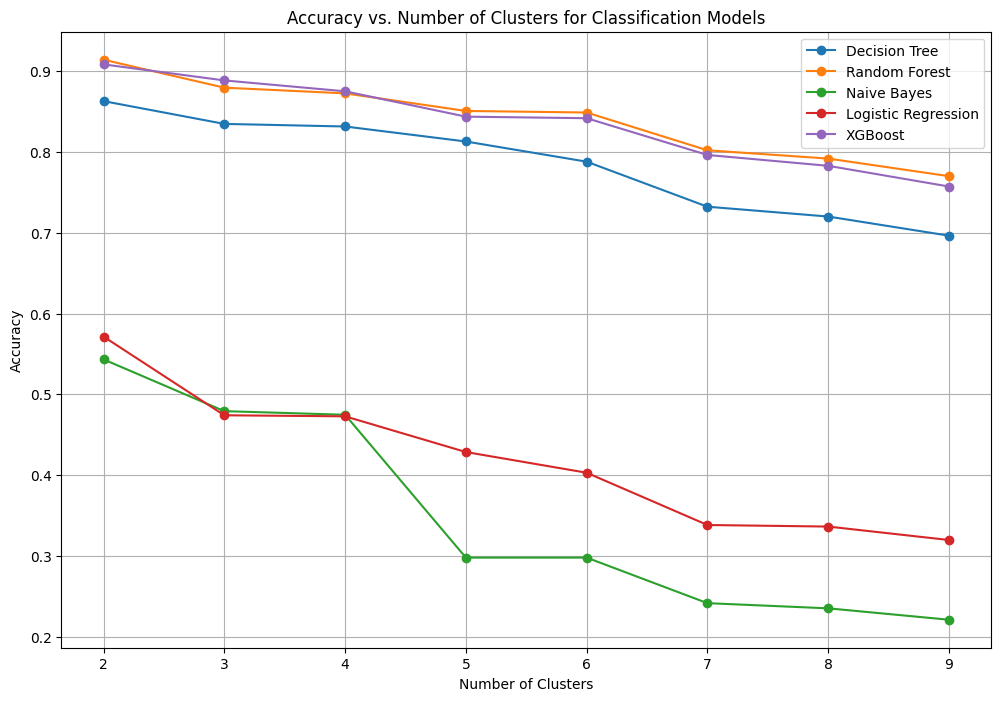

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('/content/drive/MyDrive/projet ets/corelation final/encoded/encoded_noString_noNan.csv')

classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost': xgb.XGBClassifier()
}


optimal_clusters_range = range(2, 10)
accuracy_results = {clf_name: [] for clf_name in classifiers.keys()}

for optimal_clusters in optimal_clusters_range:
    tr_duration_data = data['tr_duration'].values.reshape(-1, 1)
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    kmeans.fit(tr_duration_data)
    thresholds = np.sort(kmeans.cluster_centers_.flatten())

    def categorize_target(value):
        for i, threshold in enumerate(thresholds):
            if value <= threshold:
                return f'Class {i + 1}'
        return f'Class {len(thresholds) + 1}'

    data['class'] = data['tr_duration'].apply(categorize_target)
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(data['class'])
    X = data.drop(columns=['tr_duration', 'class'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for clf_name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results[clf_name].append(accuracy)

plt.figure(figsize=(12, 8))
for clf_name, accuracies in accuracy_results.items():
    plt.plot(optimal_clusters_range, accuracies, marker='o', linestyle='-', label=clf_name)

plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Clusters for Classification Models')
plt.legend()
plt.grid(True)
plt.show()


Decision Tree: [0.8712363869314542, 0.8398462524023063, 0.8385650224215246, 0.8071748878923767, 0.7975656630365151, 0.7392696989109545, 0.7360666239590007, 0.700832799487508]
Random Forest: [0.9103139013452914, 0.877642536835362, 0.8737988468930173, 0.8526585522101218, 0.8436899423446509, 0.7975656630365151, 0.7873158231902626, 0.7597693786034593]
Naive Bayes: [0.5432415118513774, 0.4791800128122998, 0.4746957078795644, 0.29788597053171045, 0.29788597053171045, 0.24151185137732223, 0.23510570147341447, 0.22101217168481743]
Logistic Regression: [0.5714285714285714, 0.4740550928891736, 0.4727738629083921, 0.42857142857142855, 0.4029468289557976, 0.3382447149263293, 0.336322869955157, 0.3196668802049968]
XGBoost: [0.9083920563741191, 0.8885329916720052, 0.8750800768737989, 0.8436899423446509, 0.8417680973734786, 0.7962844330557335, 0.7828315182575273, 0.7572069186418963]


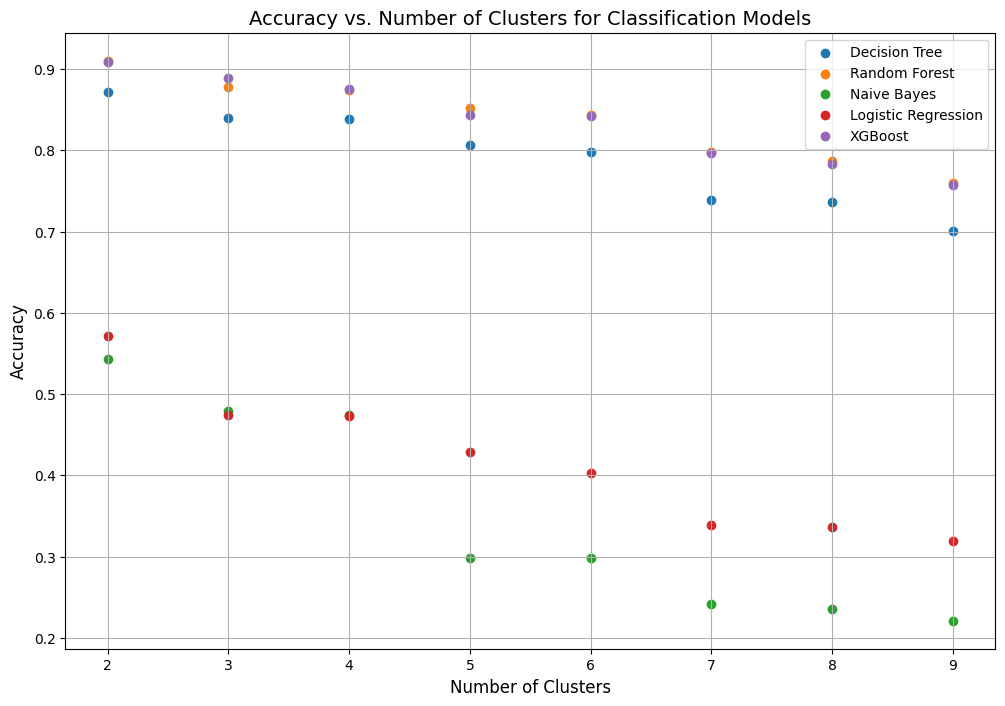

In [ ]:

for clf_name, accuracies in accuracy_results.items():
    print(f"{clf_name}: {accuracies}")

plt.figure(figsize=(12, 8))
for clf_name, accuracies in accuracy_results.items():
    plt.scatter(optimal_clusters_range, accuracies, marker='o', label=clf_name)

plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy vs. Number of Clusters for Classification Models', fontsize=14)
plt.xticks(optimal_clusters_range)
plt.legend()
plt.grid(True)
plt.show()
